# **PFE: Solution of differential equations PDEs**

### **Solving linear elliptic equation using finite difference method**

In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def init(left_interval=0, right_interval= 1, n=10):
    x = []
    h = (right_interval-left_interval)/n
    for i in range(n+1):
        x.append(i * h)
    return x, h
x, h = init()
x

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0]

In [83]:
def f_function(x):
    return -np.exp(x)

f = f_function(x)   
f

array([-1.        , -1.10517092, -1.22140276, -1.34985881, -1.4918247 ,
       -1.64872127, -1.8221188 , -2.01375271, -2.22554093, -2.45960311,
       -2.71828183])

In [84]:
def B(f, h):
    b = np.zeros(len(f))
    for i in range(len(f)):
        if i == 0:
            b[i] = (h**2 * f[i]) +1
            pass
        elif i == len(f)-1 :
            b[i] = (h**2 * f[i]) - (np.exp(1)-2)
            pass
        else :
            b[i] = h**2 * f[i]  
    return b

B(f, h)

array([ 0.99      , -0.01105171, -0.01221403, -0.01349859, -0.01491825,
       -0.01648721, -0.01822119, -0.02013753, -0.02225541, -0.02459603,
       -0.74546465])

In [85]:
def A(n) :
    a = np.zeros((n, n))
    np.fill_diagonal(a, 2)
    for i in range(n):     
        a[i][i+1] = -1
        a[i+1][i] = -1
        if i == n-2 :
            break
    return a  
A(11)

array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]])

In [86]:
def u(a, b):
    return np.linalg.inv(a) @ b

u_pred = u(A(11), B(f, h))    
u_pred

array([ 0.77709483,  0.56418966,  0.3623362 ,  0.17269677, -0.00344408,
       -0.16466667, -0.30940206, -0.43591626, -0.54229293, -0.62641419,
       -0.68593942])

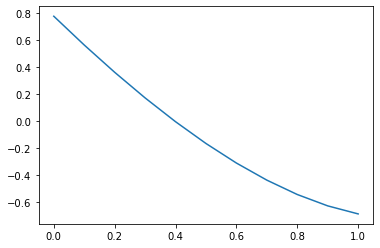

In [87]:
plt.plot(x, u_pred)
plt.xlabel('$x$')
plt.ylabel('$u$')